## Basics of Interaction

In this section of the class, you will explore how to load in data and interact with it visually using widgets in a notebook format. These widgets will form the basis of the apps that you will create in this class. Widgets are a powerful tool and can be used for a wide range of different tasks, and can even be customised with javascript if you so desire. 

First, we'll load in some data. I have created a set of custom python scripts which handle all of the data management and loading, so you don't need to worry about writing custom loading functions or anything similar, we will focus entirely on building interaction and visualisation systems rather than data wrangling or modelling. 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


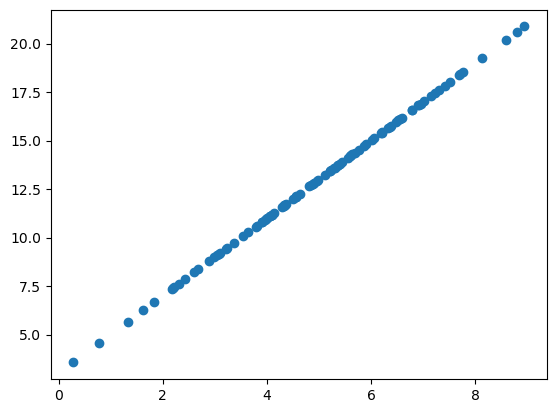

In [1]:
## We will start with some generated dummy data to learn the basics of interactive visualisation
%matplotlib inline

#from utils.functions import *
import numpy as np
import matplotlib.pyplot as plt


x = np.random.normal(5, 2, 100)
def generate_y(x, m, c):
    return m*x + c

y = generate_y(x, 2, 3)

plt.scatter(x, y)

In the above cell we have generated some data and plotted it - the Y part of the data is generated according to parameters set by the user. If you imagine this to be a model of some phenomena, then varying the input parameters lets a user or researcher explore what different scenarios might mean and how they affect outcomes important to them. 

We are now going to see how we can add a visual tool which lets a user change the parameters of the function. 

In [2]:
import ipywidgets as widgets

m_slider = widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='M:')

c_slider = widgets.IntSlider(
    value=3,
    min=0,
    max=10,
    step=1,
    description='C:')

display(c_slider)
display(m_slider)

IntSlider(value=3, description='C:', max=10)

IntSlider(value=2, description='M:', max=10)

The above code creates two integer sliders which let the user select parameter values between limits that we have defined. This lets them visually select the values and interact with them. It is easy to then extract the values from the widgets by using the .value property, as below.

M: 2
C 3


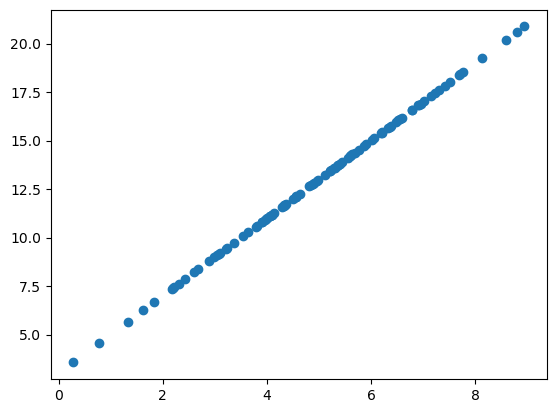

In [3]:
print("M:", m_slider.value)
print("C", c_slider.value)
y = generate_y(x, m_slider.value, c_slider.value)
plt.scatter(x, y)

Updating the chart with user input is easy, but in the above example a user changing the parameters doesn't automatically update the chart, we can change this by using observers. Observers are an important concept in web-development generally, but in this case what you need to know is that they allow you to set a function which is called when the state of a widget changes. Below, we will create two observers for the sliders which are called every time their value is changed, updating the chart. 

Because these are reactive to user input, you can use them to do all manner of interesting things, updating the charts and triggering analysis in response to the user input without requiring them to specifically click a prompt. 

In [4]:
%matplotlib inline

plot_display = widgets.Output()
with plot_display:
    y = generate_y(x, 2, 3)
    fig, ax = plt.subplots()
    chart = ax.scatter(x, y)
    plt.show()

m_slider = widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='M:')

c_slider = widgets.IntSlider(
    value=3,
    min=0,
    max=10,
    step=1,
    description='C:')



def update_chart(change):
    y = generate_y(x, m_slider.value, c_slider.value)
    plot_display.clear_output(wait=True)
    with plot_display:
        fig, ax = plt.subplots()
        chart = ax.scatter(x, y)
        plt.show()


m_slider.observe(update_chart, names='value')
c_slider.observe(update_chart, names='value')

display(plot_display)
display(m_slider)
display(c_slider)

Output()

IntSlider(value=2, description='M:', max=10)

IntSlider(value=3, description='C:', max=10)

There's a load of different ways to handle this kind of interaction, including using buttons and listening for mouseclicks. Depending on what the goals are of the application, and what computation you are doing, you might use a different approach. If you are generating data in a computationally intensive way, you might not want to re-run all your code every time the user updates something, instead using a button to start that process. 

Now, it is your turn, in the following exercises, you will create some basic interactive tools and use them to generate and visualise data. 

In [5]:
#Exercise 1: Re-write the generation function so the data is exponential (x^m + c) rather than linear and plot the data



In [6]:
#Exercise 2: Vary visualisation parameters with a dropdown menu
# Hint: Use the widgets.Dropdown() function
# Dropdown menus work in basically the same way as the sliders, but with categorical options which you specify by hand

example_dropdown = widgets.Dropdown(options=['Item 1', 'Item 2'])
display(example_dropdown)


Dropdown(options=('Item 1', 'Item 2'), value='Item 1')

In [7]:
#Exercise 3: Add a button to reset the visualisation
# Hint: Use the widgets.Button() function
# Buttons are widgets which you can click to trigger an action
# You can specify the action by passing a function to the button's on_click() method

example_button = widgets.Button(description='Reset')
example_button.on_click(lambda x: print('Button clicked!'))
display(example_button)

Button(description='Reset', style=ButtonStyle())